#  Module 3

# Talluri Surya Teja
# 15EE35028

# 1. Local Feature Extraction

## Histogram of Oriented Gradients

In the HOG feature descriptor, the distribution ( histograms ) of directions of gradients ( oriented gradients ) are used as features. Gradients ( x and y derivatives ) of an image are useful because the magnitude of gradients is large around edges and corners ( regions of abrupt intensity changes ) and we know that edges and corners pack in a lot more information about object shape than flat regions.  

To calculate a HOG descriptor, we need to first calculate the horizontal and vertical gradients; after all, we want to calculate the histogram of gradients. This is easily achieved by filtering the image with the following kernels.

    [-1 0 1], [-1 0 1].T

Next, we can find the magnitude and direction of gradient using the following formula
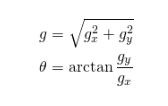

The figure below shoews gradient
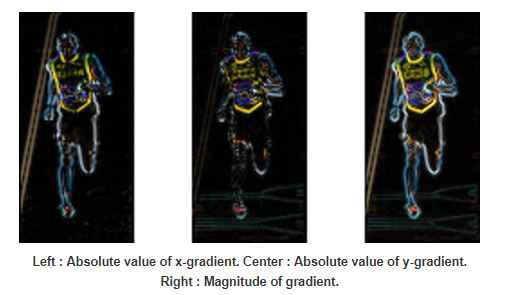

the gradient angles are between 0 and 180 degrees instead of 0 to 360 degrees. These are called “unsigned” gradients because a gradient and it’s negative are represented by the same numbers.   

Next we will calculate histograms, we will divide image into grids and divide each grid into bins. Based on angle value add magnitude to different bin

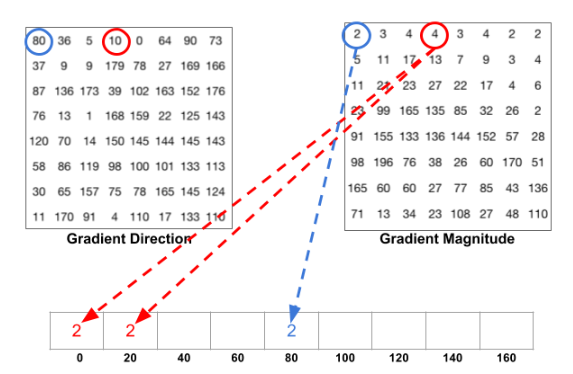

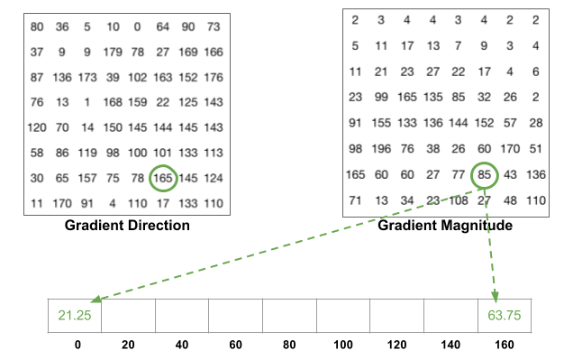

After that we will normalize the histograms by taking blocks which contains 4 or more small blocks. we would like to “normalize” the histogram so they are not affected by lighting variations.

After the normalization, we will append them to generate final features.

- I have taken color image of size (150,150) for feature caluculation

In [ ]:
from skimage import feature
import numpy as np
import cv2

def hog(image):
    if isinstance(image, str):
        image = cv2.imread(image)
        image = cv2.resize(image, (150,150))
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image = feature.hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3), 
                        visualize=False, visualise=None, transform_sqrt=True, feature_vector=True, block_norm ='L1')
    return image

# 2. Training and Testing

In [ ]:
import numpy as np
import cv2
import os
from sklearn.svm import LinearSVC
import argparse
from sklearn.model_selection import train_test_split
import pickle as pkl
from features import hog

# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-data", "--train",
    help="path to the training images")
ap.add_argument("-model", "--test",
    help="path to the trained model")
args = vars(ap.parse_args())


def detect(gray, frame, model):
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

            label = model.predict(hog(cv2.resize(gray[y:y+h, x:x+w], (150,150))).reshape(1,-1))

            cv2.putText(frame, label[0], (x+w,y-5), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,0), 2, cv2.LINE_AA)

    return frame

####################################################################### Training
if args['train'] is not None:
    path = args["train"]
    
    ### path for all images
    data_paths = [os.path.join(r, n) for r, _, f in os.walk(path) for n in f]
    
    ### extracting features and labels
    data = np.asarray([hog(i) for i in data_paths])
    labels = np.asarray([i.split('\\')[1] for i in data_paths])

    arr = np.random.permutation(len(labels))
    
    #### shuffling data
    data = data[arr]
    labels = labels[arr]

    x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size = 0.7, random_state = 42)

    model = LinearSVC(C = 150, random_state=42)
    model.fit(x_train, y_train)
    print('train accuracy: ', model.score(x_train, y_train))
    print('test accuracy: ', model.score(x_test, y_test))
    pkl.dump(model, open('svm_model_hog', 'wb'))

############################################################################### real time testing
elif args['test'] is not None:
    model = pkl.load(open(args['test'], 'rb'))

    video_capture = cv2.VideoCapture(0)

    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

    while True:
        _, frame = video_capture.read()

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        canvas = detect(gray, frame, model)
        cv2.imshow('Video', canvas)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    video_capture.release()
    cv2.destroyAllWindows()


- I have used windows python 2.7 to run this
- I have used python file (not ipynb) ( I will be including it in mail)

### Arguments

There are 2 arguments for the code file
1.  -train "path to data folder" .......... this trains the model taking the path to data
2.  -model "path to saved model" .......... this tests the model real time by opening webcam

- with the help of os.walk i could able to get the paths for all the images
- then by using list comprehension i found the features of all the data
- then i have shuffled the data to avoid all same labelled data to present nearby (model wont be able to learn properly)

### Training

- I have divided the data to 70:30 split for training and testing using train_test_split of sklean.model_selection
- I have used LinearSVC to train the model

#### Support Vector Machine

“Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes very well
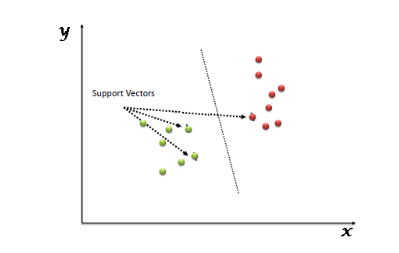

Support Vectors are simply the co-ordinates of individual observation. Support Vector Machine is a frontier which best segregates the two classes (hyper-plane/ line).

According to the SVM algorithm we find the points closest to the line from both the classes.These points are called support vectors. Now, we compute the distance between the line and the support vectors. This distance is called the margin. Our goal is to maximize the margin. The hyperplane for which the margin is maximum is the optimal hyperplane.
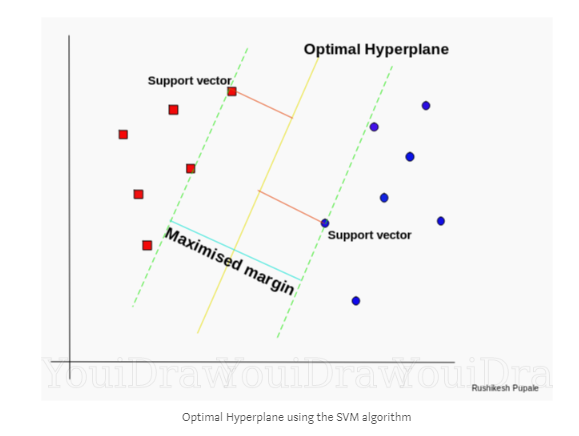

- I have acheived a training and test accuracy of 100% in data taken in lab

### Real time testing

- I have done a real time testing using webcam
- It detects face usinig Haar-cascade and takes that face and finds feature for that face and does the prediction  
Result can be viewed here: https://drive.google.com/open?id=1q-7p3N2G-anTf4cV3Ka4nHzfQ2sgwC3c